# Tutorial 1: Principle of Satellite Remote Sensing

**Content creators:** Daniele Corradini

**Content reviewers:** Claudia Acquistapace, Paula Bigalke

**Affiliation:** Institute of Geophysics and Meteorology, University of Cologne, Germany

# Tutorial Objectives

In this tutorial, students should get familiar in effectively managing geostationary satellite data from MSG using Python, learning how to visualize it and utilize its channels to extract meaningful cloud properties.

By the end of this tutorial you will be able to:

* Plot Visible (VIS) and Infrared (IR) channels after filtering outliers and selecting case studies
* Understand how to use MSG channels and their combinations to understand cloud and enviromental features.

# Setup

Understand how the students should run this tutorial and how they will access the data

For now just pretend they can access the institute cluster

Here, I am usinf Python 3.10.12 Kernel (installed with Jupyter PowerToys extenion in VC code). Maybe also give more instruction on how to run it. It can be run easilty also without VC code? Maybe important to define an enviroment with all the needed packages?

Create a google colab notebook and update data in google drive.

In [2]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import os
from glob import glob

## Section 1: Data Preprocessing

In this section you will open already processed MSG satellite data in netCDF format. Include also crop on the domain of interest. Open netcdf file with the channels using xarray (July 2023 same as Paula ex?). Interesting to see the hailstorm. 
Preprocessing and outliers: make them plot the distribution of the entire month (too much?). Ask if they see outliers. For example the high peak of low reflectances, why? So the reason is due to VIS channels at nighttime not detecting anything and this is noise that needs to be discarded. Then ask them to filter out the nighttime (in an easy way, just include a reasonable threshold for daytime, considering that July is summertime). If other outliers are visible? Maybe the sunlint of the NIR is visible, so let them try to explain why. EXTRA: should I include a part about parallax correction? and something about regridding?

1.1 Open Dataset

Define the time span, and open Dataset using xarray

In [11]:
# Define path and filepattern
filepattern = "MSG*.nc"
folder_path = "/data/sat/msg/netcdf/noparallax/2023/07/24/" #When available use the parallaxed corrected here

# Get the list of all file paths
fnames = sorted(glob(folder_path+filepattern))
len(f'Number of timestamps: {len(fnames)}')

# Open the datasets using xarray, merging along the time dimension
ds = xr.open_mfdataset(fnames, combine='nested', concat_dim='time', parallel=True)

ds


<xarray.Dataset>
Dimensions:  (y: 239, x: 351, time: 96)
Coordinates:
    lat      (y) float32 dask.array<chunksize=(239,), meta=np.ndarray>
    lon      (x) float32 dask.array<chunksize=(351,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2023-07-24 ... 2023-07-24T23:04:05
Dimensions without coordinates: y, x
Data variables:
    IR_016   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_039   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_087   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_097   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_108   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_120   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_134   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    VIS006   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    VIS008   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    WV_062   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    WV_073   (time, y, x) float32 dask.array<chunksize=(1, 239, 351), meta=np.ndarray>

1.2 Plot channels map for a timestamp



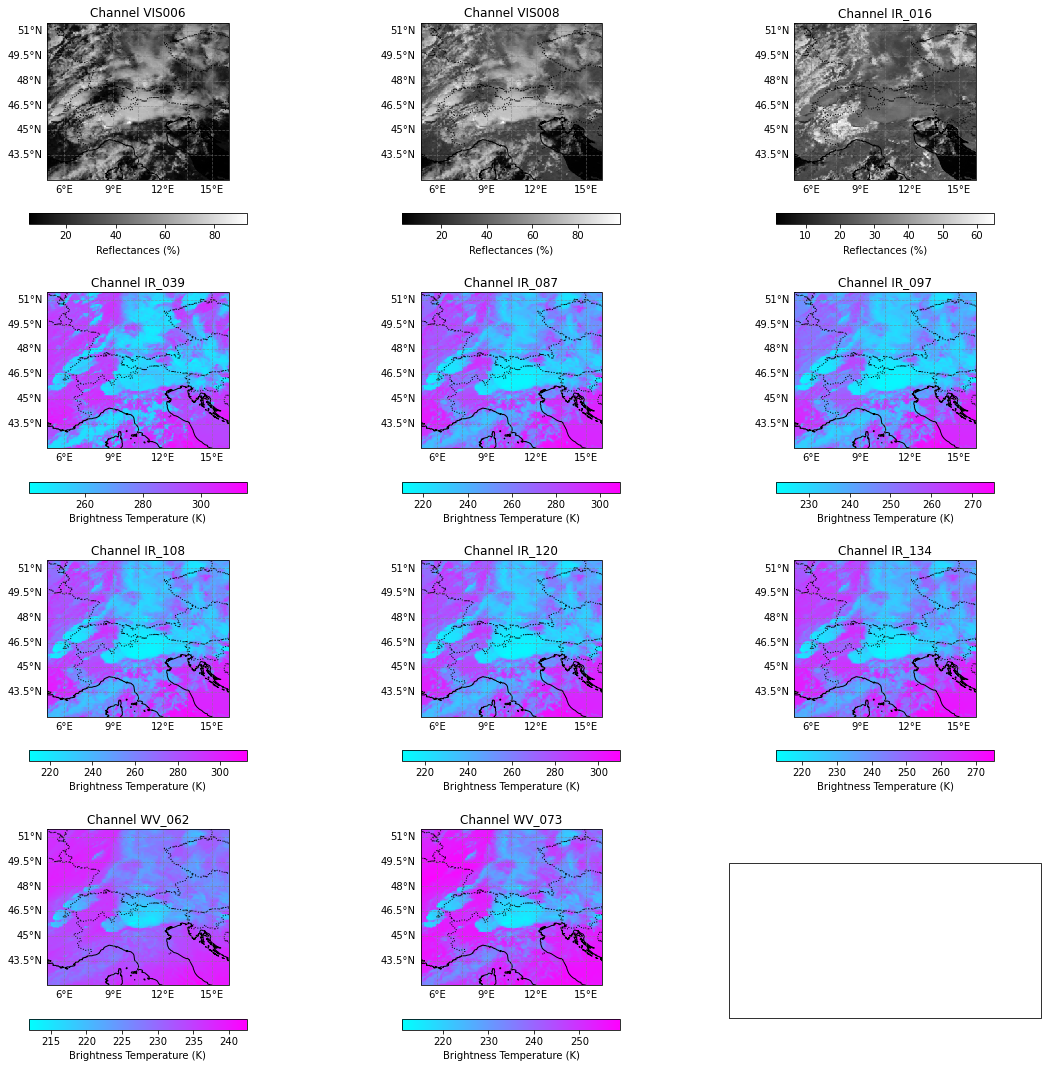

In [39]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

channels = ['VIS006', 'VIS008','IR_016', 'IR_039', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134', 'WV_062', 'WV_073']
channels_unit = ['Reflectances (%)','Reflectances (%)','Reflectances (%)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)','Brightness Temperature (K)','Brightness Temperature (K)','Brightness Temperature (K)']
channels_cmaps = ['gray','gray', 'gray', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool'] 

extent = lon_min, lon_max, lat_min, lat_max = 5., 16., 42., 51.5

# Select a timestamp
data_ss = ds.isel(time=50)

def plot_single_map(ds, extent, channel, ax, channel_unit, channel_cmap):

    ch_data = ds[channel]

    # Effettuare il plot dei dati del canale corrente
    ch_plot = ax.pcolormesh(ch_data['lon'], ch_data['lat'], ch_data.values.squeeze(),
                                transform=ccrs.PlateCarree(), cmap=channel_cmap, shading='nearest')

    # Aggiungere le linee costiere e i confini dei paesi
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Aggiungere una barra dei colori
    cbar = plt.colorbar(ch_plot, ax=ax, orientation='horizontal', shrink=0.7)
    cbar.set_label(channel_unit)

    # Impostare i limiti di estensione della mappa automaticamente in base ai dati
    ax.set_extent(extent)


    #set axis thick labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=0.75, color='gray', alpha=0.6, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    # Aggiungere il titolo del subplot
    ax.set_title(f'Channel {channel}')



def plot_channels(channels, extent, data_ss, channels_cmaps, channels_unit):
    num_rows = 4
    num_cols = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
    axs = axs.flatten()

    # Plot each channel
    for i, channel in enumerate(channels):
        plot_single_map(data_ss, extent, channel,axs[i],channels_unit[i],channels_cmaps[i])

    # Adjust layout
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    # Show plot
    plt.show()

plot_channels(channels, extent, data_ss, channels_cmaps, channels_unit)

Now try to run again the code but setting the time in line 12 at 5. What happen to the VIS and NIR channels?
Can you guess why?

Remove the nighttime in the dataset for the VIS/NIR channels 

In [18]:
#mask the nighttime for VIS/NIR channels

#Choose time thresholds far from the sunsets and sunrise, considering also the period of the year (Summer!)
#Be careful that the time of the dataset is given in UTC!
time_min = 8
time_max = 16

time_mask = (ds['time.hour'] >= time_min) & (ds['time.hour'] <= time_max)

# Apply the mask across selected variables 
selected_vars = ['IR_016', 'VIS006', 'VIS008']
for var in selected_vars:
    ds[var] = ds[var].where(time_mask, np.nan)

Plot the time trend to check if the nighttime mask worked

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


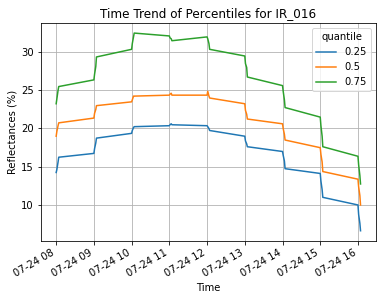

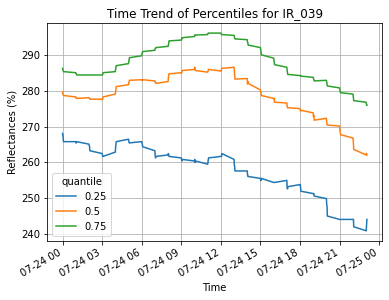

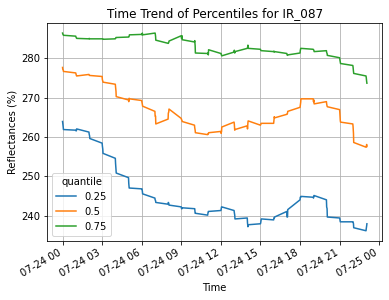

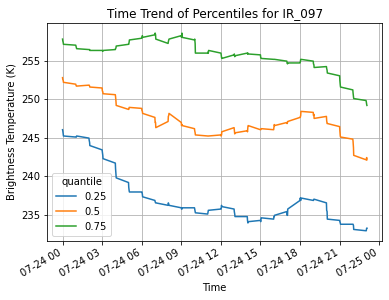

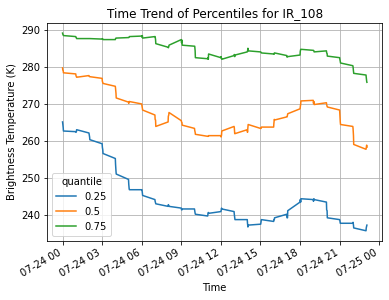

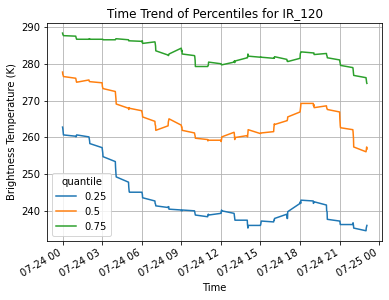

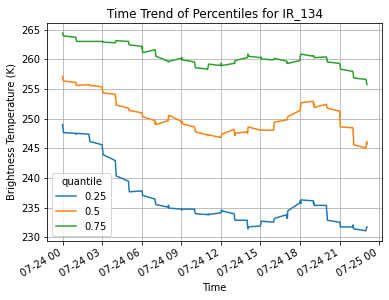

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


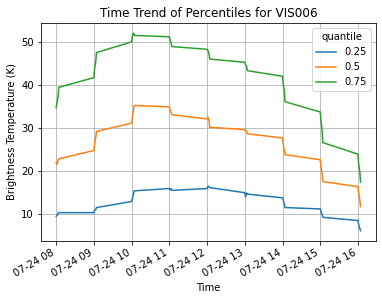

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


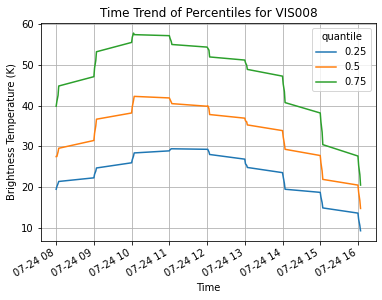

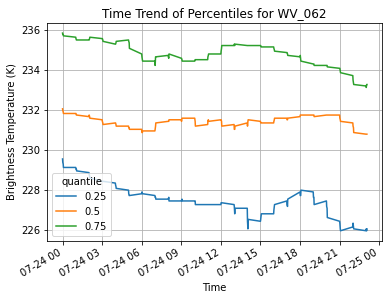

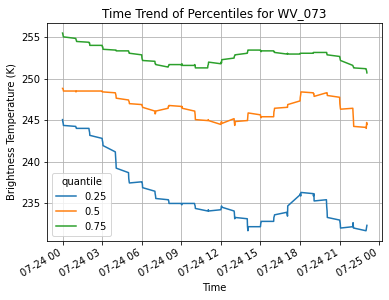

In [23]:
# Compute 25-50-75th percentile and plot them along the time

ds_quantile = ds.quantile([0.25, 0.5, 0.75], dim=['x', 'y'])
#print(ds_quantile)


# Loop through each variable in the dataset
for i, var in enumerate(ds_quantile.data_vars):
    ds_quantile[var].plot.line(x='time', hue='quantile', add_legend=True)
    plt.title(f'Time Trend of Percentiles for {var}')
    plt.xlabel('Time')
    plt.ylabel(channels_unit[i])
    plt.grid(True)
    plt.show()

Now, crop the data on a specific domain of interest and plot the map of each channel.

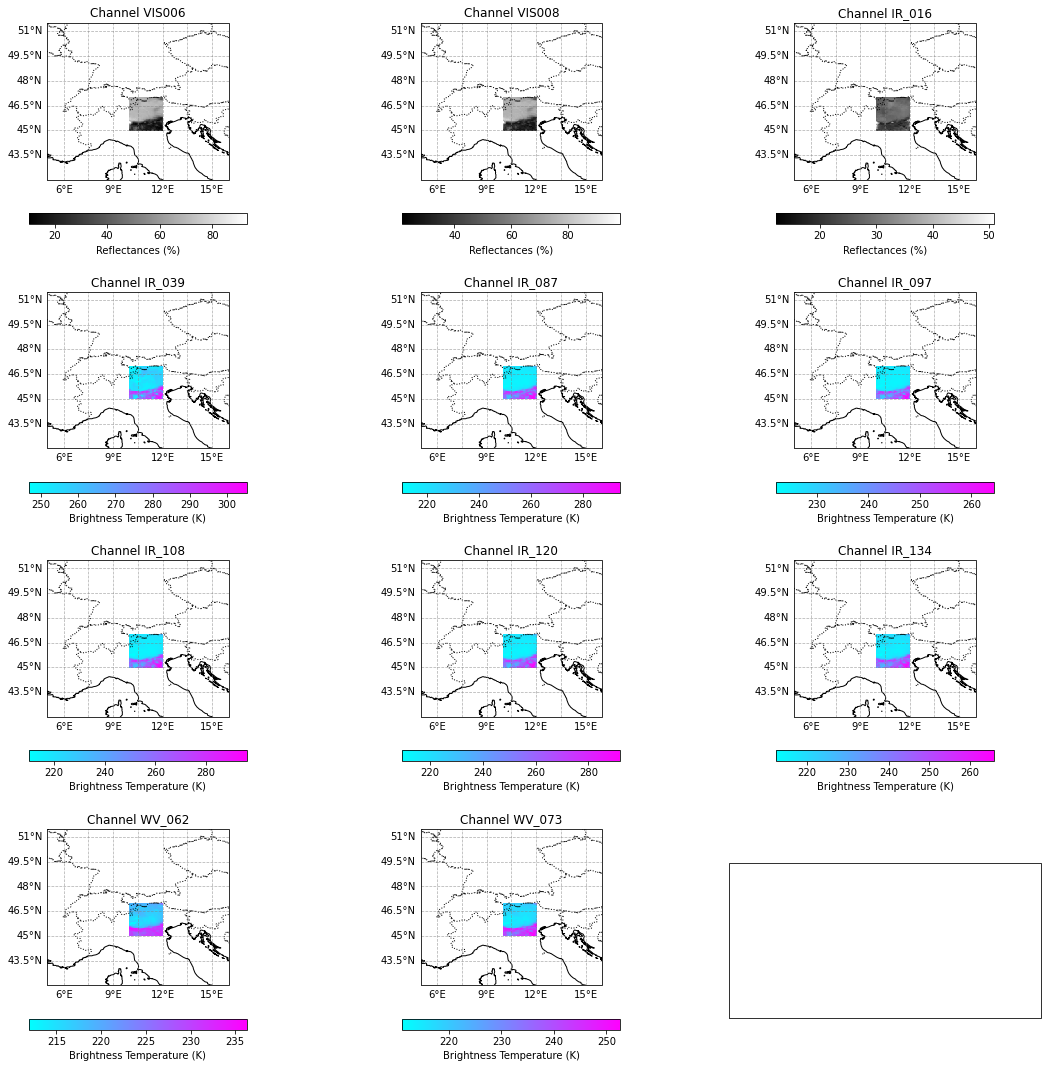

In [26]:
# Coordinates for Trento area
lon_min, lon_max, lat_min, lat_max = 10, 12, 45, 47

# Assuming 'ds' is your xarray Dataset and has coordinates named 'lat' and 'lon'
ds_Trento = ds.copy(deep=True)  # Making a deep copy of the dataset

# Crop the dataset around the specified coordinates
ds_Trento = ds_Trento.where((ds_Trento.lon >= lon_min) & (ds_Trento.lon <= lon_max) & 
                              (ds_Trento.lat >= lat_min) & (ds_Trento.lat <= lat_max), drop=True)

plot_channels(channels, extent, ds_Trento.isel(time=50), channels_cmaps, channels_unit)




Now plot the distribution of the data to see if there are any weird/corrupted values
(Remember to insert some outliers by hand in some channels?)

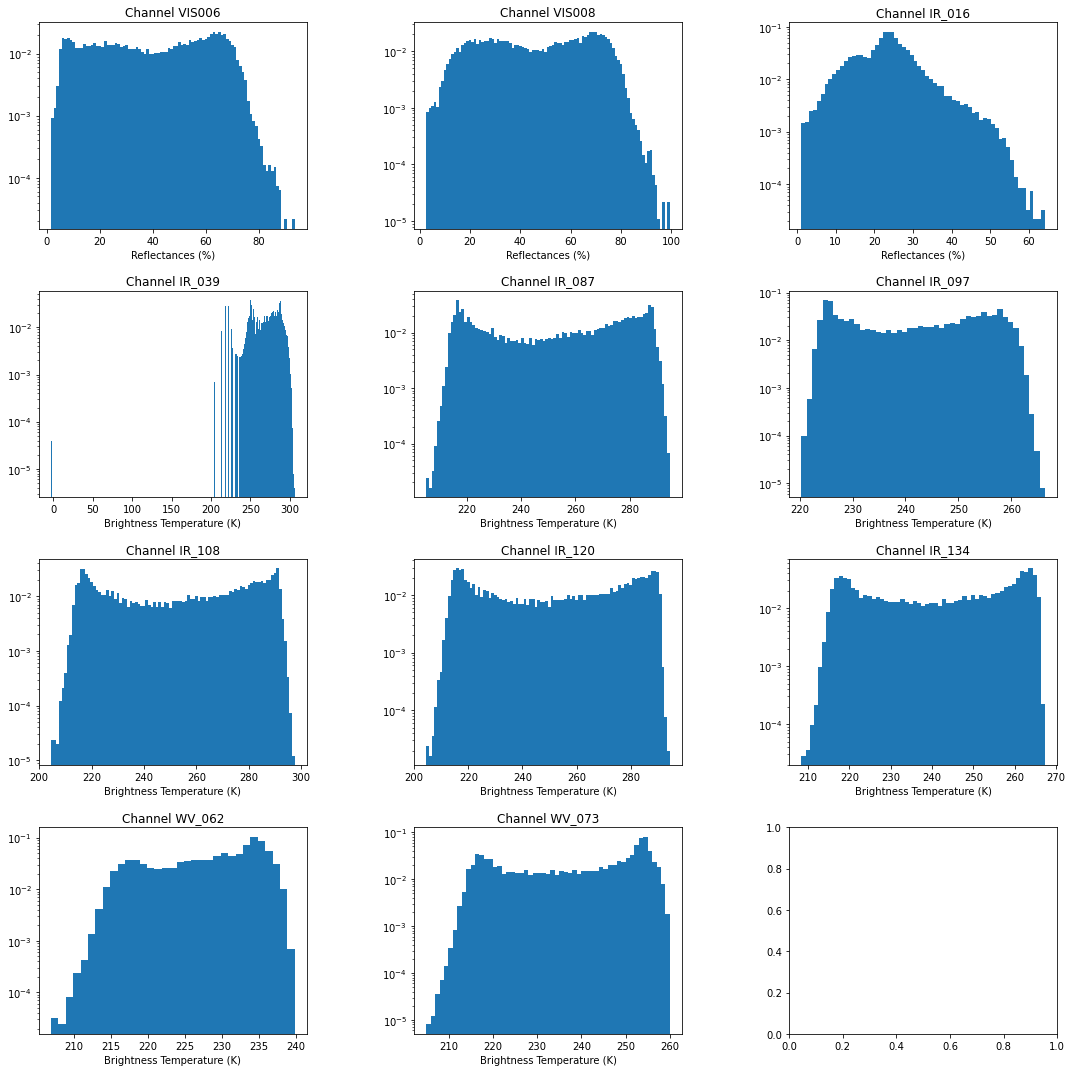

In [32]:
#Plot the distribution of the channels

def get_max_min(ds, ch):
    ch_values = ds[ch][:]
    ch_values = ch_values.values.flatten()
    ch_values = ch_values[~np.isnan(ch_values)]
    max = np.amax(ch_values)
    min = np.amin(ch_values)

    return min, max


def plot_distribution(channels, data_ss, channels_unit, bin_width):
    num_rows = 4
    num_cols = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axs = axs.flatten()

    # Plot each channel
    for i, channel in enumerate(channels):
        ch_data = data_ss[channel]
        ch_min, ch_max = get_max_min(data_ss, channel)
        bins = np.arange(ch_min, ch_max + bin_width, bin_width)

        # Effettuare il plot dei dati del canale corrente
        axs[i].hist(ch_data.values.flatten(), bins=bins, density=True) 

        axs[i].set_xlabel(channels_unit[i])

        axs[i].set_yscale('log')

        # Aggiungere il titolo del subplot
        axs[i].set_title(f'Channel {channel}')

    # Aggiusta il layout
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.3, wspace=0.4)

    # Mostra il plot
    plt.show()

plot_distribution(channels, ds_Trento, channels_unit, 1)


Where do you see outliers?
Why do you think the distribution of the channel 3.9 micron is like that?

#Parallax Correction

Open two files from the same time, one without parallax and the other with parallax

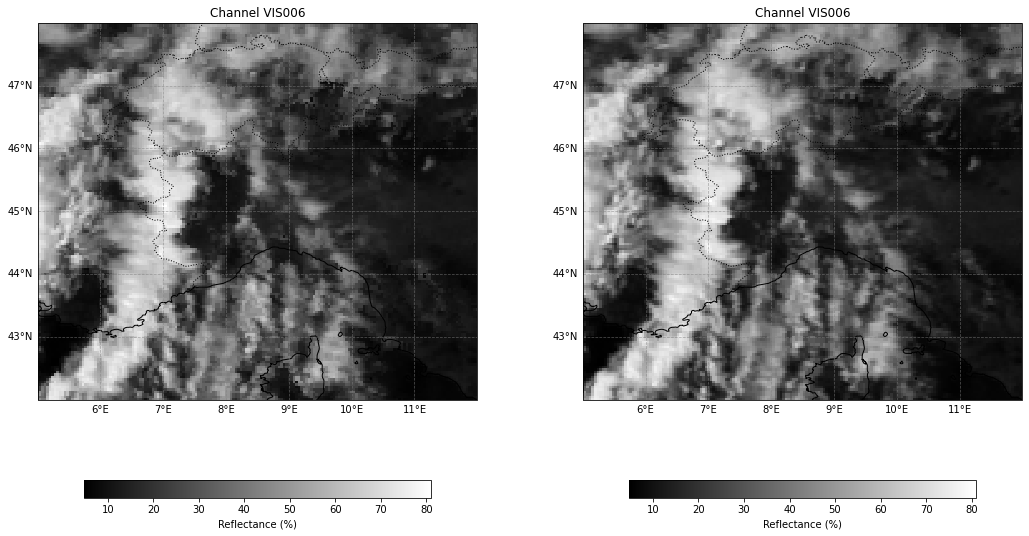

In [78]:
# Open file with parallax
file_parallax = '/data/sat/msg/netcdf/parallax/2023/06/20230622-EXPATS-RG'
ds_parallax = xr.open_dataset(file_parallax)
ds_parallax = ds_parallax.isel(time=50) #Correspond to 2023-06-01 00:00

# Open file without parallax 
file_noparallax = "/data/sat/msg/netcdf/noparallax/2023/06/22/MSG3-SEVI-MSG15-0100-NA-20230622124242_regular_grid.nc"
ds_noparallax = xr.open_dataset(file_noparallax)
ds_noparallax = ds_noparallax.isel(time=0) 

# Plot only one channel for each dataset
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

reduce_area = lon_min, lon_max, lat_min, lat_max = 5, 12, 42, 48

# Plot one channel for both parallax and no parallax
plot_single_map(ds_parallax, reduce_area, 'VIS006',axs[0],'Reflectance (%)','gray')
plot_single_map(ds_noparallax, reduce_area, 'VIS006',axs[1],'Reflectance (%)','gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show plot
plt.show()


Can you spot which is the main difference among the two plot? (Hint: look at the realtive postion of the clouds with respect to the grid)

In case of really high clouds what will happen if the satellite view is really slanted?

## Regridding Satellite Data

In this subsection it will be shown what to do if a ifferent grid want to be applied
Usually this is done when from the irregular native gri of the sattellite one one to regirdid in a equally spaced grid easy to handle. 

In this case, since the data are already given in a regular grid, we will just regrid the data in a different regular grid. When you plot the map, anyway you shouldn't notice any difference.

In [92]:
from scipy.interpolate import griddata

# If lat and lon are directly aligned with y and x respectively, you can proceed
ds_new = ds_Trento.swap_dims({'y': 'lat', 'x': 'lon'})


# Confirm the change
#print(ds_new.lat.values)
#print(ds_new.lon.values)
#print(ds_new['IR_108'].isel(time=0).values)


# Create shifted latitude and longitude arrays
lat_shifted = ds_new.lat + 0.02
lon_shifted = ds_new.lon + 0.01

# Interpolate the dataset to the new shifted grids
ds_shifted = ds_new.interp(lat=lat_shifted, lon=lon_shifted, method='linear')
ds_shifted['lon'] = lon_shifted
ds_shifted['lat'] = lat_shifted
#print(ds_shifted.lat.values)
#print(ds_shifted.lon.values)
#print(ds_shifted['IR_108'].isel(time=0).values)


# Plot only one channel for each dataset
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

reduce_area = lon_min, lon_max, lat_min, lat_max = 6, 15, 43, 48

# Plot one channel for both parallax and no parallax
plot_single_map(ds_new.isel(time=0), reduce_area, 'VIS006',axs[0],'Reflectance (%)','gray')
plot_single_map(ds_shifted.isel(time=0), reduce_area, 'VIS006',axs[1],'Reflectance (%)','gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show plot
plt.show()

"""

#Use the dataset with parallax correction and check the lat lon
lat_arr = ds_parallax.lat.values
lon_arr = ds_parallax.lon.values

# Generate grid points
lat_reg_grid, lon_reg_grid = np.meshgrid(lat_arr, lon_arr, indexing='ij')

#Set up a dumb example, let try to regrid the values on a grid shifted 0.02° N and 0.01 E°

# New shifted grid
lat_shifted = lat_arr + 0.02
lon_shifted = lon_arr + 0.01
lat_shifted_grid, lon_shifted_grid = np.meshgrid(lat_shifted, lon_shifted, indexing='ij')

# Assume 'temp' is the variable in ds_parallax you want to regrid
temp_values = ds_parallax['temp'].values  # Replace 'temp' with your actual variable name

# Flatten the original grid coordinates and data for interpolation
original_coords = np.column_stack([lat_reg_grid.ravel(), lon_reg_grid.ravel()])
temp_values_flat = temp_values.ravel()

# Flatten the new grid coordinates
new_coords = np.column_stack([lat_shifted_grid.ravel(), lon_shifted_grid.ravel()])

# Perform the interpolation
temp_values_on_new_grid = griddata(original_coords, temp_values_flat, new_coords, method='linear')

#reshape the interpolated data back to the shape of the new grid.
temp_values_on_new_grid = temp_values_on_new_grid.reshape(lat_shifted_grid.shape)

# Create a new xarray Dataset with the interpolated data
ds_new_grid = xr.Dataset({
    'temp': (['lat', 'lon'], temp_values_on_new_grid),
}, coords={
    'lat': (['lat'], lat_shifted),
    'lon': (['lon'], lon_shifted)
})

"""


(51,)
(51,)


AttributeError: 'function' object has no attribute 'squeeze'

Regridding can be also applied to increase/deacrease the resolution of your data.

How would you do in instead of a regular grid of 0.04° you would like to have a regular grid with a step of 0.02°?

In caso you would have a cloud mask for example, defined as a catecorigal variable (0: clear sky, 1: cloudy), would yu still use linear method for the regrid?

What can happen when interpolating close to the boundaries of your domain? How can you solve that?

## Section 2:  Physics of the Channels

Select a few timesteps for the hailstorm. Plot single channels and make a gif of the hailstorm events, maybe ask where there are the deep convective and why? So they should check at the brightness temperature, if it’s cold it means high clouds. And reflectances are also high (thick clouds).

Let them plot RGB images using Satpy. Ask which features are visible with RGB computed using VIS that are not visible using IR channels (mainly ground). 
Plot also IR combinations, the one relative to some CLoud proxy. And let them identify where the precipitating clouds or ice clouds for example. If they do cover this in the theoretical lecture, also ask them why.


## Resources

Put here Data EUMETSAT, Data Tailor etc. 

Important Python Packages and tutorials 

## References

Some important references about satellite remote sensing